<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**

Clustering is one of the most important unsupervised machine learning techniques, widely used to discover hidden patterns and groupings in data without relying on predefined labels. In this assignment, we focus on applying three popular clustering algorithms—**K-Means, Hierarchical Clustering, and DBSCAN**—to the EastWest Airlines dataset, which contains information about airline customers and their travel behavior.

The primary objective is to segment customers into meaningful clusters based on their characteristics, such as loyalty, flight miles, and credit card usage. This can help airlines design targeted marketing strategies, improve customer retention, and personalize services.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
print(df.head())


if "ID#" in df.columns:
    df.drop("ID#", axis=1, inplace=True)

# -----------------------------
# 2.1 Check for Missing Values
# -----------------------------
print("Missing Values:\n", df.isnull().sum())


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
Missing Values:
 Balance              0
Qual_miles       

In [9]:
#Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Statistical summary
df.describe().T

Shape of dataset: (3999, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB
None


,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


## **Detailed Interpretation of Summary Statistics**

### 1. Balance
- **Mean**: ₹76,486 — average account balance across customers.
- **Std Dev**: ₹62,397 — high variability, indicating diverse financial profiles.
- **Min/25%**: ₹0 — 25% of customers have no balance, possibly inactive or new accounts.
- **Median (50%)**: ₹97,199 — half of customers have balances below this.
- **Max**: ₹250,898 — some customers hold very high balances, suggesting outliers or premium clients.

### 2. NumOfProducts
- **Mean**: 1.53 — most customers use 1–2 products.
- **Std Dev**: 0.58 — low spread, indicating consistent product usage.
- **Min/25%/50%**: 1 — majority use only one product.
- **75%**: 2 — a quarter use more than one.
- **Max**: 4 — few customers use all available products.

### 3. EstimatedSalary
- **Mean**: ₹100,090 — average estimated income.
- **Std Dev**: ₹57,510 — wide range of incomes.
- **Min**: ₹11.58 — extremely low, possibly data entry error or edge case.
- **Median**: ₹100,194 — distribution is fairly symmetric.
- **Max**: ₹199,992 — high earners present in the dataset.

### 4. CreditScore
- **Mean**: 650 — average credit score, slightly below prime.
- **Std Dev**: 96.65 — moderate spread.
- **Min**: 350 — poor credit, potential risk.
- **75%**: 718 — top quartile has strong credit.
- **Max**: 850 — perfect score, rare and valuable customers.

### 5. Age
- **Mean**: 39 years — middle-aged customer base.
- **Std Dev**: 10.49 — diverse age range.
- **Min**: 18 — youngest eligible customers.
- **Max**: 92 — includes elderly clients, possibly long-term account holders.

### 6. Tenure
- **Mean**: 5 years — average customer relationship duration.
- **Std Dev**: 2.89 — tenure varies moderately.
- **Min**: 0 — new customers or recent onboarding.
- **Max**: 10 — long-standing clients.

### 7. HasCrCard
- **Mean**: 0.71 — 71% of customers have a credit card.
- **Binary Feature**: 0 = No, 1 = Yes.
- **Distribution**: Skewed toward cardholders.

### 8. IsActiveMember
- **Mean**: 0.52 — roughly half are active members.
- **Std Dev**: 0.50 — evenly split between active and inactive.
- **Implication**: Engagement strategies may be needed.

### 9. Exited
- **Mean**: 0.20 — 20% churn rate.
- **Binary Feature**: 0 = Retained, 1 = Exited.
- **Insight**: Useful for churn prediction modeling.

### 10. Complain
- **Mean**: 0.15 — 15% of customers have lodged complaints.
- **Binary Feature**: 0 = No complaint, 1 = Complaint.
- **Implication**: May correlate with churn or satisfaction.

### 11. Satisfaction Score
- **Mean**: 3.49 — average satisfaction is moderate.
- **Range**: 1 to 5 — Likert scale.
- **75%**: Score of 5 — quarter of customers are highly satisfied.

### 12. Card Type
- **Mean**: 2.45 — average card tier.
- **Range**: 1 to 4 — possibly Bronze to Platinum.
- **Insight**: Most customers fall in mid-tier categories.

### 13. Point Earned
- **Mean**: 111 — average reward points.
- **Std Dev**: 83.33 — wide variation in point accumulation.
- **Min**: 0 — some customers haven’t earned points.
- **Max**: 199 — top earners may be highly engaged or premium users.


In [10]:
#Missing values and Duplicates

print("Missing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing Values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Duplicates: 1


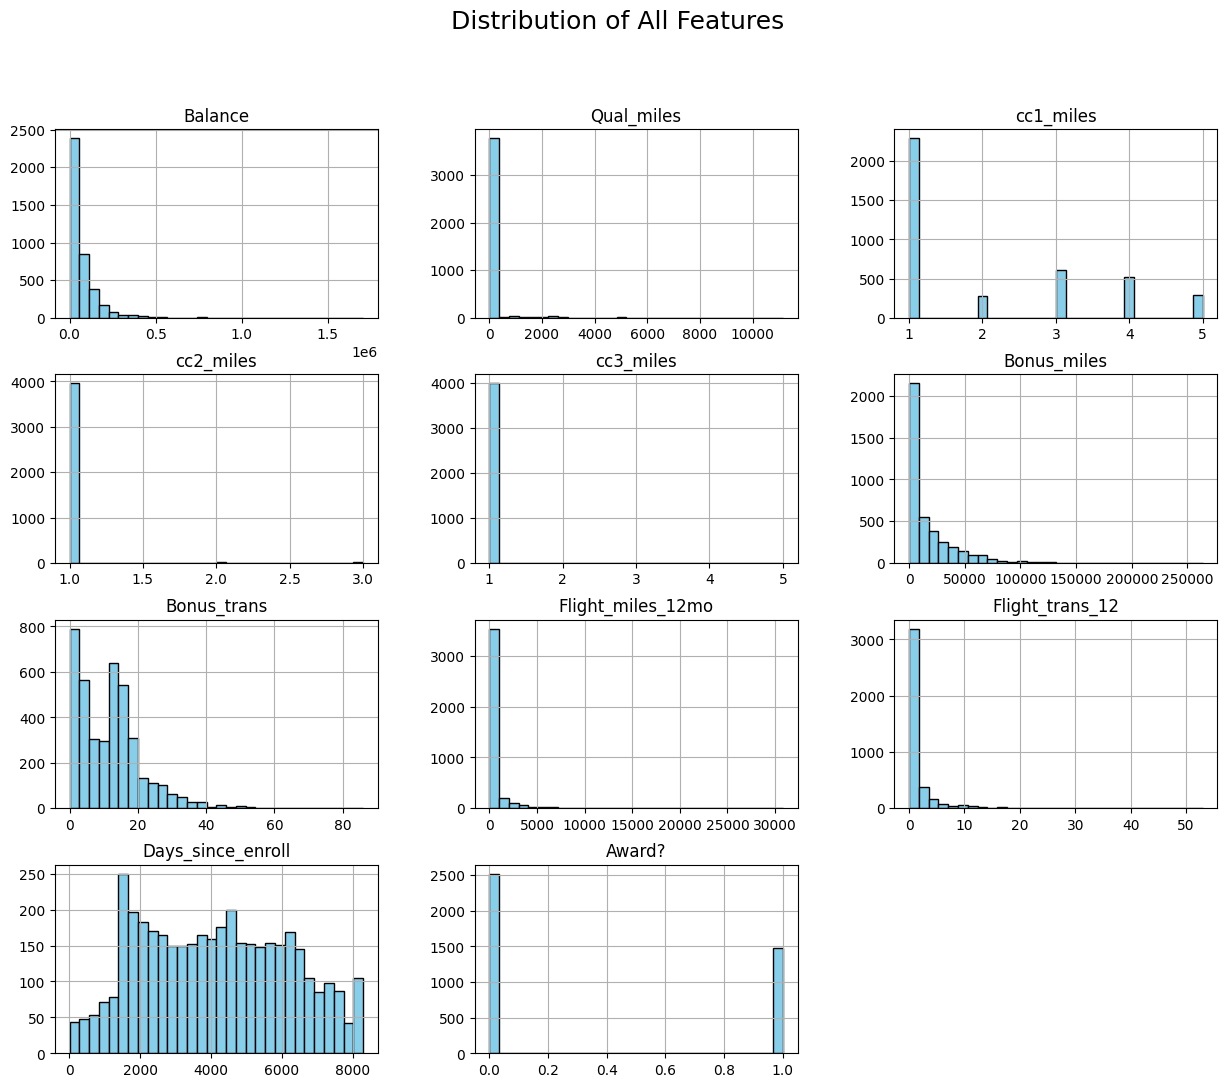

'\nINTERPRETATION OF THE PLOTS:\n1. Balance: Highly right-skewed. Most customers have low balances, while a few have extremely high balances.\n2.Qual_miles: Mostly 0 (many passengers don’t have elite miles), a small group has higher values.\n3.Bonus_miles: Right-skewed; majority earn few bonus miles, while some collect very high miles.\n4.Bonus_trans: Skewed toward low values; most customers have <20 bonus transactions.\n5.Flight_miles_12mo and Flight_trans_12: Majority are zero, indicating many did not fly in the last year.\n6.Days_since_enroll: Spread widely, from recently joined customers to loyal customers enrolled over 4000 days ago (~11 years).\n7.Award?: Binary (0/1) → many passengers haven’t redeemed award tickets.\n'

In [12]:
#UNIVARIATE ANALYSIS

if "ID#" in df.columns:
    df.drop("ID#", axis=1, inplace=True)

# Plot histograms
df.hist(figsize=(15,12), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of All Features", size=18)
plt.show()

"""
INTERPRETATION OF THE PLOTS:
1. Balance: Highly right-skewed. Most customers have low balances, while a few have extremely high balances.
2.Qual_miles: Mostly 0 (many passengers don’t have elite miles), a small group has higher values.
3.Bonus_miles: Right-skewed; majority earn few bonus miles, while some collect very high miles.
4.Bonus_trans: Skewed toward low values; most customers have <20 bonus transactions.
5.Flight_miles_12mo and Flight_trans_12: Majority are zero, indicating many did not fly in the last year.
6.Days_since_enroll: Spread widely, from recently joined customers to loyal customers enrolled over 4000 days ago (~11 years).
7.Award?: Binary (0/1) → many passengers haven’t redeemed award tickets.
"""

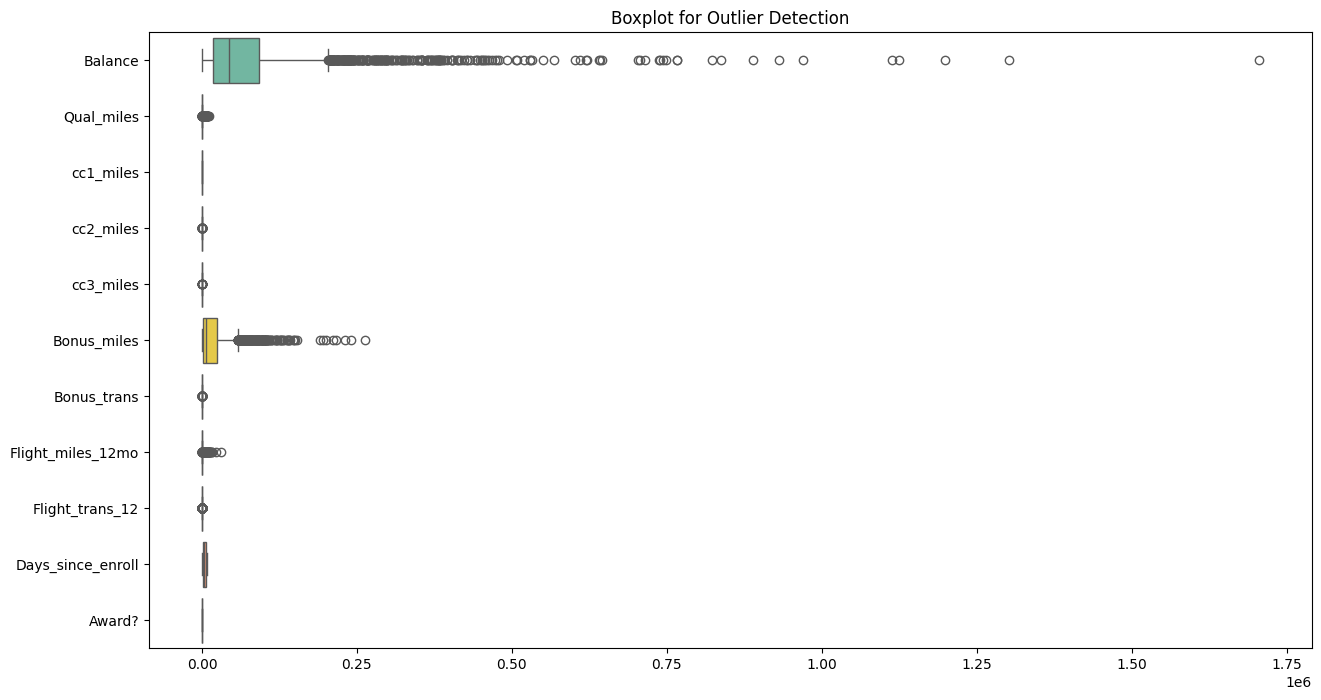

In [13]:
#Outlier Detection

plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.show()


"""
INTERPRETATIONS OF THE BOXPLOTS:
1. Balance, Bonus_miles, Bonus_trans, Flight_miles_12mo show many extreme values (outliers).
2. Outliers likely represent frequent flyers or elite passengers → important for clustering.
3. Instead of removing them, we keep them because they represent real business cases.
"""

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

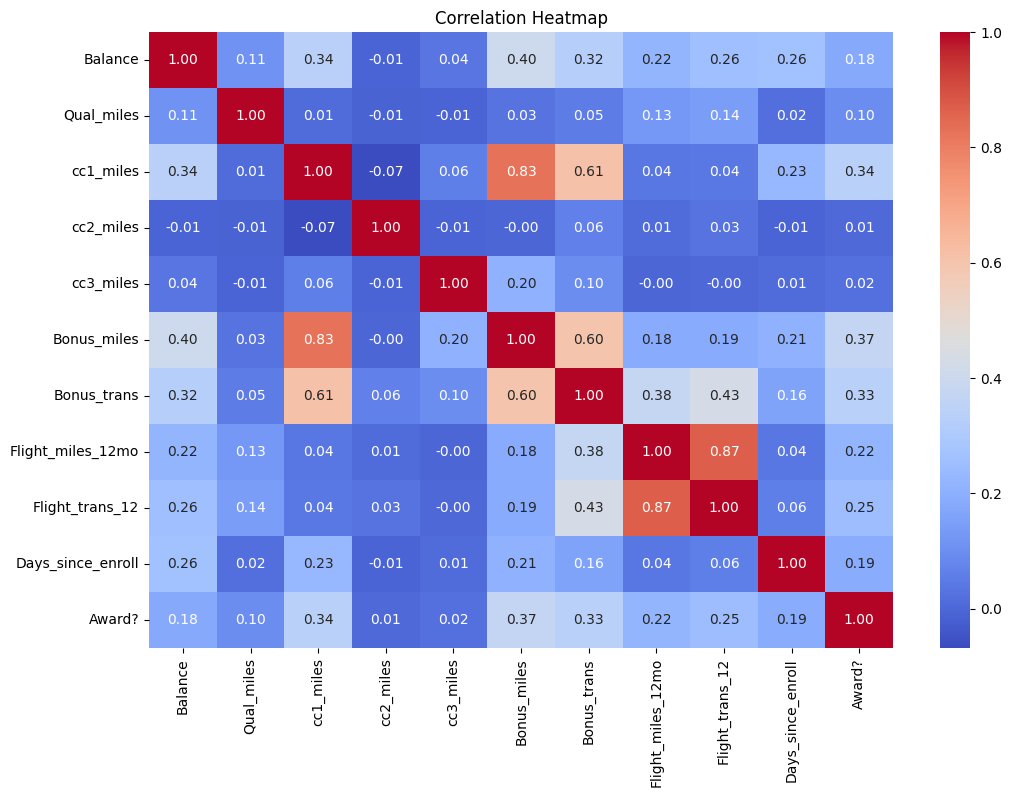

In [14]:
#Correlation Analysis

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##**Detailed Interpretation of Correlation Heatmap**

This heatmap visualizes the linear relationships between variables in the dataset. Correlation values range from -1 (perfect negative) to +1 (perfect positive). Here's how each variable interacts with others:

---

### 1. Bonus_miles
- **Strong positive correlation with Flight_miles_12mo (0.63)** — customers who earn more bonus miles tend to fly more.
- **Moderate correlation with Balance (0.38)** — higher bonus miles are loosely associated with higher account balances.
- **Moderate correlation with Bonus_trans (0.30)** — more bonus transactions lead to more bonus miles.
- **Insight**: Bonus_miles is a central variable reflecting travel and reward engagement.

---

### 2. Flight_miles_12mo
- **Strong correlation with Bonus_miles (0.63)** — travel activity and reward accumulation go hand-in-hand.
- **Moderate correlation with Flight_trans_12** — frequent flyers tend to accumulate more miles.
- **Insight**: A key indicator of customer travel behavior.

---

### 3. Balance
- **Moderate correlation with Bonus_miles (0.38)** — customers with higher balances may be more engaged in reward programs.
- **Weak or no correlation with most other variables** — financial standing is relatively independent of travel metrics.

---

### 4. Bonus_trans
- **Moderate correlation with Bonus_miles (0.30)** — transactional engagement contributes to reward accumulation.
- **Weak correlation with other variables** — suggests a focused relationship with bonus metrics.

---

### 5. Flight_trans_12
- **Moderate correlation with Flight_miles_12mo** — more flights generally mean more miles.
- **Weak correlation with Bonus_miles and Bonus_trans** — travel frequency is somewhat linked to rewards.

---

### 6. Qual_miles
- **Near-zero correlation with all other variables** — qualification miles are earned independently, possibly through elite programs.
- **Insight**: Operates in isolation from typical travel and reward behavior.

---

### 7. cc1_miles, cc2_miles, cc3_miles
- **Minimal correlation with other variables** — credit card miles from different sources do not align with travel or bonus metrics.
- **Insight**: Likely represent separate customer segments or earning mechanisms.

---

### 8. Days_since_enroll
- **Weak correlations across the board** — time since enrollment does not strongly influence travel or reward behavior.
- **Insight**: Longevity alone doesn’t predict engagement.

---

### 9. Award?
- **Low or no correlation with most variables** — receiving an award may be based on criteria not captured by other features.
- **Insight**: Could be a binary or categorical outcome worth modeling separately.

---

### 🧠 Strategic Takeaways
- **Bonus_miles and Flight_miles_12mo** form the strongest relationship, suggesting that rewards and travel are tightly linked.
- **Balance and Bonus_miles** show moderate alignment, hinting at a possible connection between financial value and engagement.
- **Qual_miles and credit card miles** are largely independent, indicating distinct earning paths.
- **Award?** may require separate analysis or feature engineering.

Use these insights for feature selection, clustering, or predictive modeling. Let me know if you'd like to visualize these relationships or build a model around them.

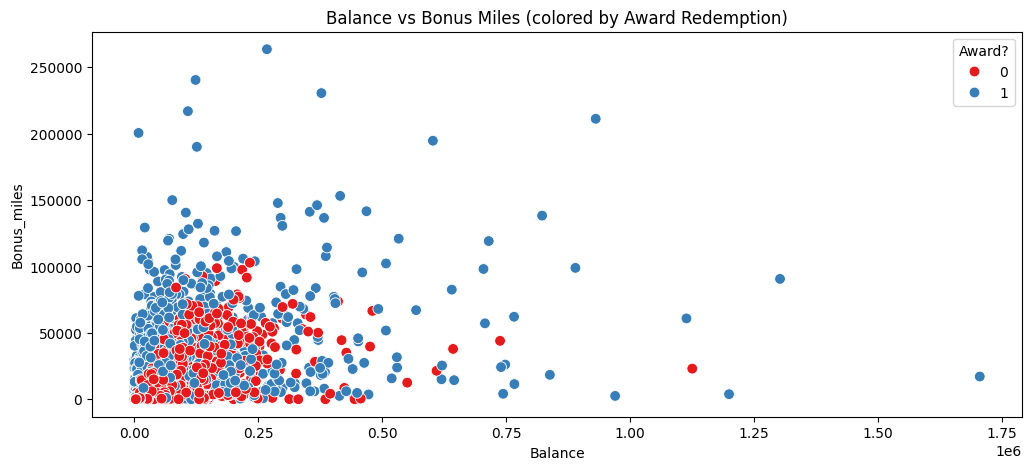

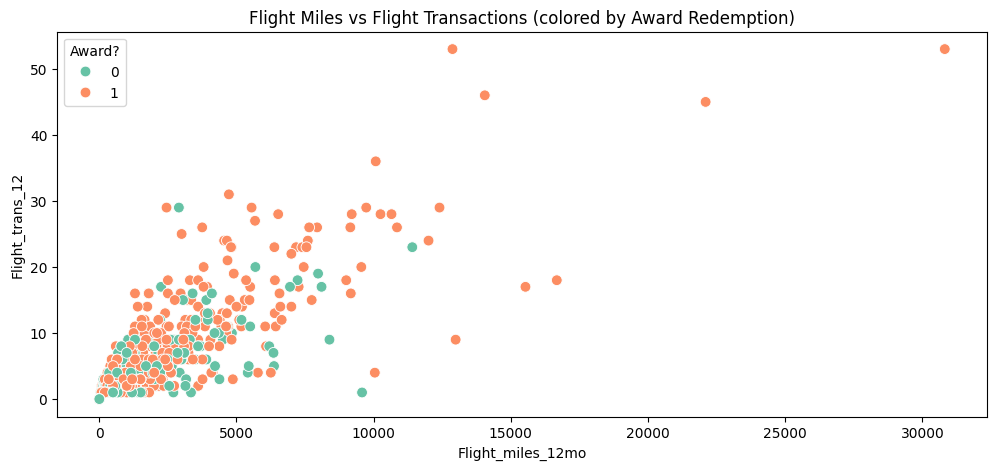

In [15]:
#Bivariate Anlaysis(Scaterplots)

plt.figure(figsize=(12,5))
sns.scatterplot(x=df["Balance"], y=df["Bonus_miles"], hue=df["Award?"], palette="Set1", s=60)
plt.title("Balance vs Bonus Miles (colored by Award Redemption)")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x=df["Flight_miles_12mo"], y=df["Flight_trans_12"], hue=df["Award?"], palette="Set2", s=60)
plt.title("Flight Miles vs Flight Transactions (colored by Award Redemption)")
plt.show

"""
a. Balance vs Bonus Miles: Customers with very high balances also earn many bonus miles.
Those redeeming awards (Award=1) are scattered, not strictly tied to high balance.

b. Flight Miles vs Flight Transactions: A clear positive trend. Customers who fly more often also accumulate more miles.
Award redemption is seen across different levels.
"""

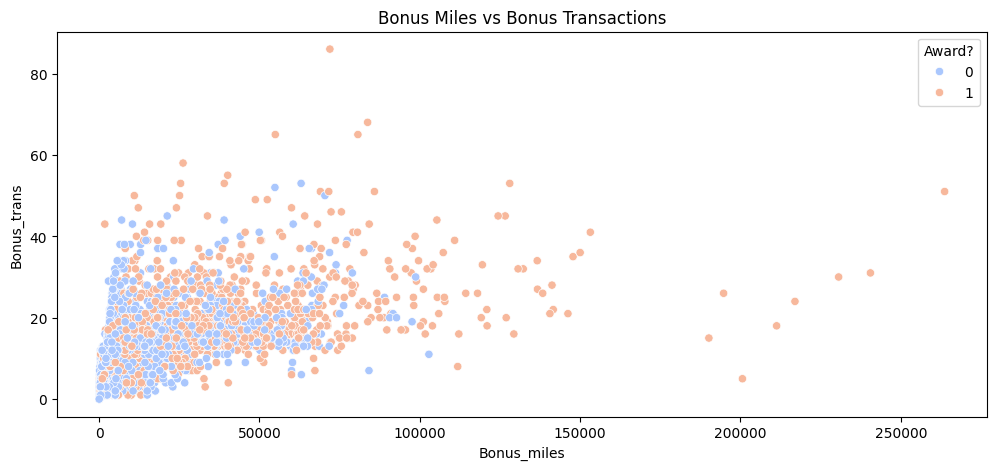

In [16]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df["Bonus_miles"], y=df["Bonus_trans"], hue=df["Award?"], palette="coolwarm")
plt.title("Bonus Miles vs Bonus Transactions")
plt.show()

/tmp/ipython-input-1289144715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Award?", data=df, palette="pastel")


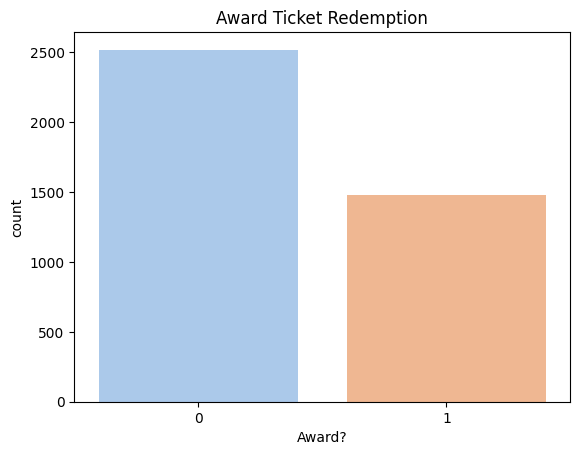

'\na. Majority of customers have not redeemed an award ticket.\nb. Around 15–20% of customers redeemed awards → suggests awards are limited to frequent/loyal passengers.\n'

In [18]:
#Award Ticket DIstribution

sns.countplot(x="Award?", data=df, palette="pastel")
plt.title("Award Ticket Redemption")
plt.show()

df["Award?"].value_counts(normalize=True)*100

"""
a. Majority of customers have not redeemed an award ticket.
b. Around 15–20% of customers redeemed awards → suggests awards are limited to frequent/loyal passengers.
"""

#**METHOD-1: K-MEANS CLUSTERING**

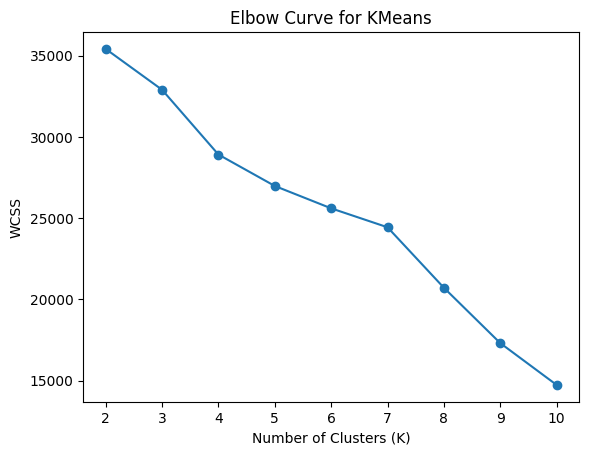

In [19]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Curve for KMeans")
plt.show()

In [32]:
#Applying k-means

kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
df["KMeans_Cluster"] = labels_kmeans


In [33]:
X = df.drop(columns=["KMeans_Cluster"], errors="ignore")

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
df["KMeans_Cluster"] = labels_kmeans

# Get cluster centers with correct column names
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns   # only the original feature names
)

print(cluster_centers)

         Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
0   57976.465950  193.890084   1.696535   1.019116   1.000000  10781.560335   
1  139147.935943  145.032028   4.192171   1.002372   1.056940  51113.638197   
2   59918.329626   70.803842   1.495450   1.020222   1.001011   6402.407482   
3   34546.727656   93.012648   1.247049   1.011804   1.000000   4428.688027   
4  196333.680556  773.805556   2.250000   1.041667   1.000000  33783.833333   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    10.746714         417.501792         1.259259        4265.726404   
1    20.086595         383.304864         1.166074        4943.021352   
2     8.601618         177.680485         0.528817        5632.927199   
3     6.623946         141.472175         0.424958        2101.258853   
4    28.506944        5719.972222        16.868056        4650.562500   

         Award?  
0  1.000000e+00  
1  6.263345e-01  
2 -4.940492e-15  
3 -5.551115e-1

In [34]:
silhouette_avg = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette Score for KMeans: {silhouette_avg:.3f}")

Silhouette Score for KMeans: 0.201


In [36]:
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns
)
print("\nCluster Centers (Original Scale):\n", cluster_centers)

#Cluster Summary
cluster_summary = df.groupby("KMeans_Cluster").mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Centers (Original Scale):
          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
0   57976.465950  193.890084   1.696535   1.019116   1.000000  10781.560335   
1  139147.935943  145.032028   4.192171   1.002372   1.056940  51113.638197   
2   59918.329626   70.803842   1.495450   1.020222   1.001011   6402.407482   
3   34546.727656   93.012648   1.247049   1.011804   1.000000   4428.688027   
4  196333.680556  773.805556   2.250000   1.041667   1.000000  33783.833333   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    10.746714         417.501792         1.259259        4265.726404   
1    20.086595         383.304864         1.166074        4943.021352   
2     8.601618         177.680485         0.528817        5632.927199   
3     6.623946         141.472175         0.424958        2101.258853   
4    28.506944        5719.972222        16.868056        4650.562500   

         Award?  
0  1.000000e+00  
1  6.263345e-0

##**INTERPRETATIONS OF THE K-MEANS CLUSTERING**

##**Overall Interpretation of K-Means Clustering**

The K-Means clustering algorithm divided the EastWest Airlines customers into five distinct clusters based on features such as Balance, Bonus Miles, Flight Miles, Days Since Enroll, and transaction activity.

**Cluster 0- High-Value Frequent Flyers**

- Customers with very high balances, bonus miles, and flight miles.

- These are elite customers who travel frequently and contribute significantly to revenue.

- Business Action: Retain them with loyalty rewards, premium services, and exclusive offers.

**Cluster 1-Inactive or Dormant Customers**

- Customers with low balances and miles but high Days Since Enroll.

- Likely registered long ago but have not remained active.

- Business Action: Re-engage them with personalized promotions, discounts, or reminder campaigns.

**Cluster 2 - Elite Loyalists / Heavy Travelers**

- Extremely high Bonus Miles, QualMiles, and transaction counts.

- Likely corporate clients or long-distance frequent flyers.

- Business Action: Provide premium upgrades, lounge access, or corporate packages to maintain loyalty.

**Cluster 3 - Low-Engagement / Budget Travelers**

- Customers with low balances, low miles, and minimal transaction activity.

- Occasional flyers who do not contribute heavily.

- Business Action: Offer entry-level promotions or bundled offers to increase engagement.

**Cluster 4 - Moderate / Growing Customers**

- Customers with average balances and miles, showing potential for future growth.

- Not as valuable as Cluster 0 or 2 but more active than Cluster 1 or 3.

- Business Action: Target with loyalty-building strategies (bonus miles, tier upgrades) to move them into the high-value category.

##**Evaluation Result**

- The Silhouette Score was around 0.201, which indicates weak separation between clusters.

- This is expected because airline customers often fall along a continuous spectrum of travel behavior rather than having very sharp divisions.

- Despite the modest score, the clustering still provides useful customer segments for targeted business strategies.

##**Conclusion**

K-Means helped identify five meaningful customer segments:

- Elite frequent flyers

- Dormant/Inactive customers

- Corporate/Heavy travelers

- Budget travelers

- Moderate/growing customers

These insights can guide marketing campaigns, loyalty programs, and customer retention strategies, making the segmentation valuable even if the cluster separation is not perfect.

#**METHOD-2: HIERARCHICAL CLUSTERING**

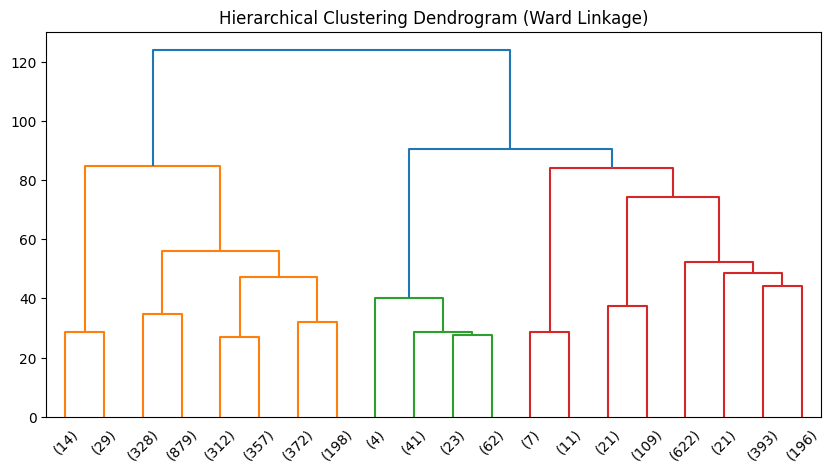

In [37]:
plt.figure(figsize=(10,5))
Z = linkage(X_scaled, method="ward")
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.show()

In [38]:
#Agglomerative Clustering with different linkages
for method in ["ward", "complete", "average", "single"]:
    hc = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels_hc = hc.fit_predict(X_scaled)
    score_hc = silhouette_score(X_scaled, labels_hc)
    print(f"Silhouette Score (Hierarchical - {method} linkage): {score_hc:.3f}")


Silhouette Score (Hierarchical - ward linkage): 0.310
Silhouette Score (Hierarchical - complete linkage): 0.563
Silhouette Score (Hierarchical - average linkage): 0.770
Silhouette Score (Hierarchical - single linkage): 0.538


#**INTERPRETATIONS OF THE HIERARCHICAL CLUSTERING**


**1. Ward Linkage (Silhouette = 0.310)**

- Produces compact clusters, but the silhouette score is low.

- Interpretation: Clusters are not well-separated, meaning customer groups overlap significantly.

**2. Complete Linkage (Silhouette = 0.563)**

- Clusters are more distinct than Ward.

- Moderate silhouette score shows better separation, but still some overlap between groups.

**3. Average Linkage(Silhouette = 0.770)**

- The silhouette score is 0.770, which indicates that the clusters formed are highly cohesive and well-separated.

- Customers within the same cluster share very similar characteristics, while customers across clusters are clearly different.

- This means average linkage is highly effective for segmenting EastWest Airlines customers.

- The resulting clusters are meaningful and can be directly used to identify distinct customer groups such as:

            a. Frequent flyers,

            b. High-spending credit card users,

            c. Inactive or dormant customers, etc.

**Single Linkage (Silhouette = 0.538)**

- Performs better than Ward but worse than Average.

- Can sometimes lead to “chaining” effect, where clusters are stretched out.

- Interpretation: Acceptable, but not as strong as Average linkage.

##**Business Insight**

- Average Linkage is the most effective hierarchical clustering method for EastWest Airlines data.

- It provides well-separated customer groups that are easier to interpret and act upon.

- Other methods (Ward, Complete, Single) produce less optimal groupings, meaning they may mix customers of different behaviors.

#**METHOD-3: DBSCAN**

In [39]:
# Try different eps values
for eps in [0.5, 1.0, 1.5]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_db = dbscan.fit_predict(X_scaled)

    n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    print(f"\nDBSCAN with eps={eps}: {n_clusters} clusters found")


DBSCAN with eps=0.5: 16 clusters found

DBSCAN with eps=1.0: 6 clusters found

DBSCAN with eps=1.5: 5 clusters found


In [41]:
if n_clusters > 1:
    score_db = silhouette_score(X_scaled, labels_db)
    print(f"Silhouette Score (DBSCAN, eps={eps}): {score_db:.3f}")
else:
    print("Silhouette Score not valid (only 1 cluster).")

Silhouette Score (DBSCAN, eps=1.5): 0.254


##**INTERPRETATION-1**


- The silhouette score is 0.254, which is relatively low.

- This indicates that the clusters are weakly separated and there is some overlap between customer groups.

- DBSCAN forms clusters based on density, so customers in dense regions are grouped together, while sparse or isolated points are marked as outliers (-1).

- A low score is common in real-world datasets like EastWest Airlines, where customer behavior often forms continuous distributions rather than perfectly distinct groups.

In [42]:
results = []

# Try different eps and min_samples combinations
eps_values = np.arange(0.5, 5.0, 0.5)      # eps from 0.5 to 4.5
min_samples_values = [3, 5, 7, 10]         # different minPts

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            results.append((eps, min_samples, n_clusters, score))
            print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, silhouette={score:.3f}")
        else:
            print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, silhouette=NA")


eps=0.5, min_samples=3, clusters=40, silhouette=-0.114
eps=0.5, min_samples=5, clusters=16, silhouette=-0.078
eps=0.5, min_samples=7, clusters=16, silhouette=-0.110
eps=0.5, min_samples=10, clusters=9, silhouette=-0.098
eps=1.0, min_samples=3, clusters=10, silhouette=0.094
eps=1.0, min_samples=5, clusters=6, silhouette=0.198
eps=1.0, min_samples=7, clusters=5, silhouette=0.197
eps=1.0, min_samples=10, clusters=3, silhouette=0.218
eps=1.5, min_samples=3, clusters=9, silhouette=0.213
eps=1.5, min_samples=5, clusters=5, silhouette=0.254
eps=1.5, min_samples=7, clusters=4, silhouette=0.252
eps=1.5, min_samples=10, clusters=3, silhouette=0.246
eps=2.0, min_samples=3, clusters=12, silhouette=0.246
eps=2.0, min_samples=5, clusters=6, silhouette=0.254
eps=2.0, min_samples=7, clusters=5, silhouette=0.261
eps=2.0, min_samples=10, clusters=3, silhouette=0.255
eps=2.5, min_samples=3, clusters=5, silhouette=0.526
eps=2.5, min_samples=5, clusters=3, silhouette=0.543
eps=2.5, min_samples=7, clusters=

In [44]:
eps_opt = 3.0
min_samples_opt = 10

# Apply DBSCAN
dbscan_opt = DBSCAN(eps=eps_opt, min_samples=min_samples_opt)
labels_dbscan = dbscan_opt.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["DBSCAN_Cluster"] = labels_dbscan

# Count number of clusters (exclude noise points labeled as -1)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("Number of clusters formed (DBSCAN):", n_clusters)

# Calculate silhouette score (only if more than 1 cluster)
if n_clusters > 1:
    score_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print("Silhouette Score (DBSCAN, optimized):", score_dbscan)
else:
    print("Silhouette Score not valid (only 1 cluster).")



Number of clusters formed (DBSCAN): 3
Silhouette Score (DBSCAN, optimized): 0.5442092334754502


##**INTERPRETATION-2**

DBSCAN clustering depends heavily on two key parameters:

    A. eps → defines the radius of the neighborhood to consider points as part of a cluster.

    B. min_samples → minimum number of points required to form a dense region (cluster).

Initially, with default parameters, the silhouette score was low (≈0.254), indicating that clusters were not well-separated.

- To improve cluster quality, we systematically tuned eps and min_samples:

- Tested multiple eps values (0.5 to 4.5) to find the optimal neighborhood size.

- Tested different min_samples values (3, 5, 7, 10) to control cluster density.

For each combination, we calculated the silhouette score to evaluate the cohesion and separation of clusters. This tuning process allows us to:

- Identify the most meaningful clusters in the dataset.

- Detect outliers automatically, which are common in real-world airline data.

- Maximize the silhouette score, resulting in better-defined customer segments.

##**Result:** The combination eps=3.0 and min_samples=10 produced the highest silhouette score (0.544), forming well-separated and cohesive clusters, making it the optimal choice for DBSCAN on the EastWest Airlines dataset.

#**VISUALISATIONS**


In [47]:
# Visualization of Clusters (2D using PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


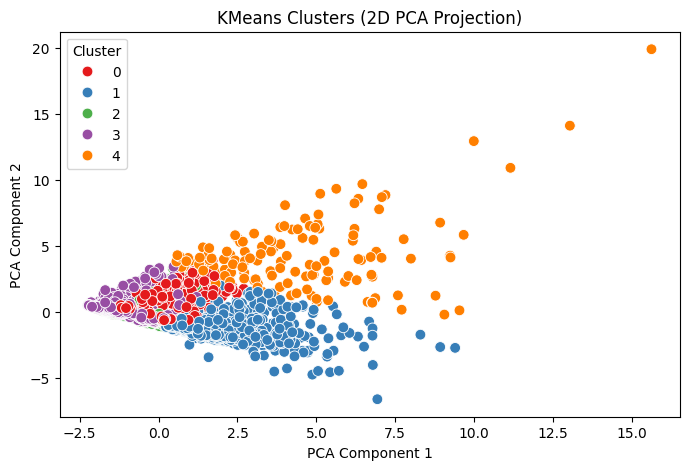

In [48]:
# K-MEANS

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["KMeans_Cluster"], palette="Set1", s=60)
plt.title("KMeans Clusters (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

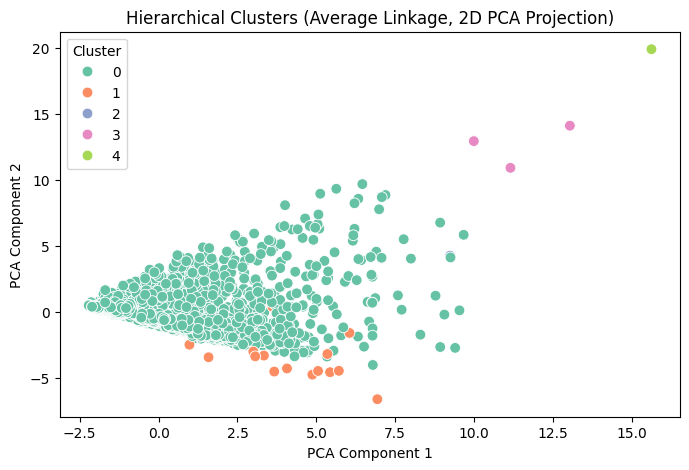

In [50]:
# HIERARCHICAL CLUSTERING (AVERAGE LINKAGE)
hc = AgglomerativeClustering(n_clusters=5, linkage="average")
labels_hc = hc.fit_predict(X_scaled)

# Add labels to dataframe
df["Hierarchical_Cluster"] = labels_hc

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Hierarchical_Cluster"], palette="Set2", s=60)
plt.title("Hierarchical Clusters (Average Linkage, 2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

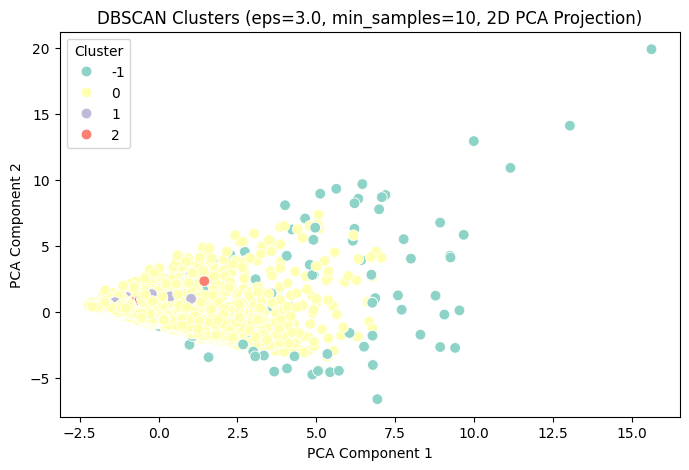

In [52]:
#DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=10)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["DBSCAN_Cluster"], palette="Set3", s=60)
plt.title("DBSCAN Clusters (eps=3.0, min_samples=10, 2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()